170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 72s 44ms/step - loss: 1.5126 - accuracy: 0.4528 - val_loss: 1.2719 - val_accuracy: 0.5383
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1743 - accuracy: 0.5824 - val_loss: 1.1116 - val_accuracy: 0.6094
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0210 - accuracy: 0.6399 - val_loss: 1.0474 - val_accuracy: 0.6341
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9209 - accuracy: 0.6752 - val_loss: 0.9350 - val_accuracy: 0.6691
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8444 - accuracy: 0.7028 - val_loss: 0.8871 - val_accuracy: 0.6909
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7916 - accuracy: 0.7227 - val_loss: 0.9358 - val_accuracy: 0.6762
Epoch 7/10
1563/1563 [==============================] - 6

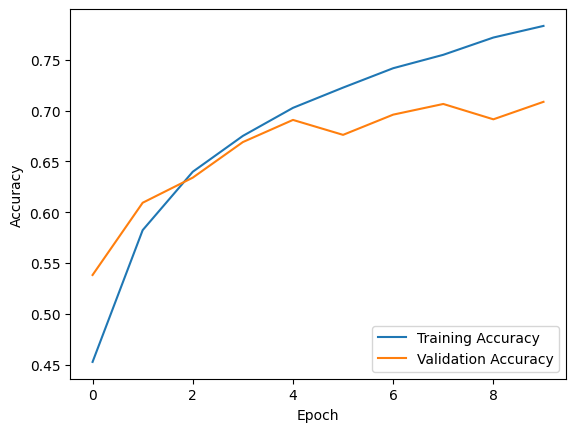

1/1 [==============================] - 0s 18ms/step


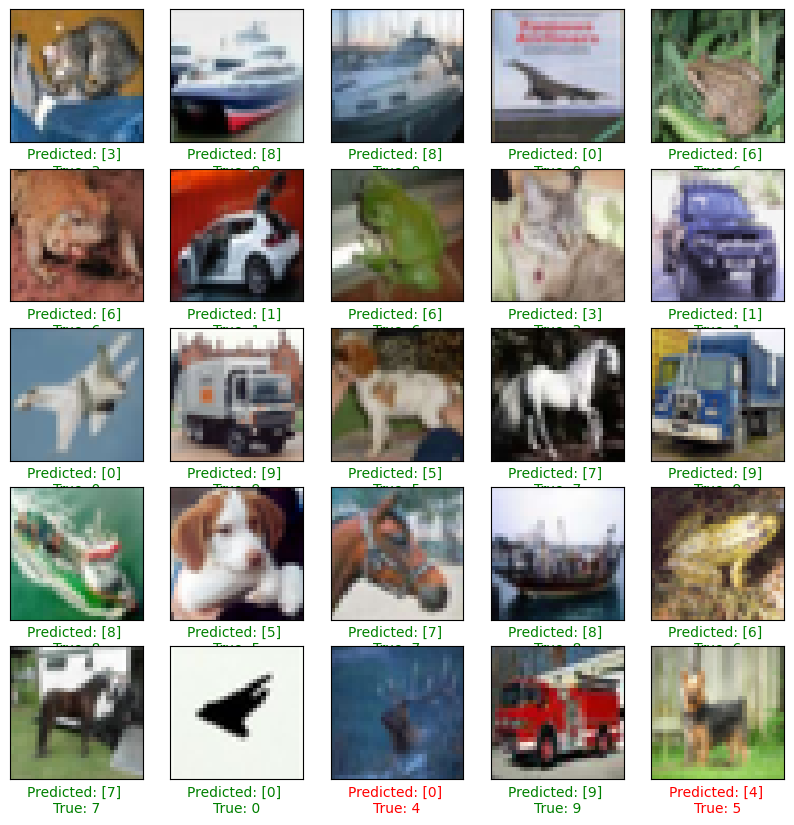

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = tf.argmax(model.predict(test_images[i:i+1]), axis=1)
    true_label = test_labels[i][0]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label} \nTrue: {true_label}', color=color)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section